# Train a regression ConvNN model using BOHB tuner

In [52]:
import sys  
sys.path.insert(0, '../telescopeML/')

from ObservPredictor import * #ProcessObservationalDataset, ObsParameterPredictor
from DeepRegTrainer import TrainRegression
from StatVisAnalyzer import *

# Step 1: Load the dataset

In [2]:
# original dataset
df=pd.read_csv('../../datasets/browndwarf_R100_v4_newWL_v2.csv.bz2', compression='bz2')
df.head(3)

,gravity,temperature,c_o_ratio,metallicity,2.512,2.487,2.462,2.438,2.413,2.389,...,0.971,0.962,0.952,0.943,0.933,0.924,0.915,0.906,0.897,is_augmented
0,5.0,1100,0.25,-1.0,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
1,5.0,1100,0.25,-0.7,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
2,5.0,1100,0.25,-0.5,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no


In [3]:
wl = pd.read_csv('../../datasets/wl.csv')
wl.head(3)

,wl
0,2.511960
1,2.486966
2,2.462220


In [4]:
df.iloc[::10]

,gravity,temperature,c_o_ratio,metallicity,2.512,2.487,2.462,2.438,2.413,2.389,...,0.971,0.962,0.952,0.943,0.933,0.924,0.915,0.906,0.897,is_augmented
0,5.00,1100,0.25,-1.0,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
10,5.00,1100,0.25,1.7,8.540979e-09,9.610928e-09,8.362026e-09,6.331807e-09,5.411898e-09,3.597492e-09,...,2.589948e-09,1.400508e-09,1.423739e-09,1.331622e-09,5.718932e-10,2.525684e-09,2.577776e-09,2.171606e-09,1.170498e-09,no
20,5.00,1100,0.50,1.0,2.089233e-08,2.547443e-08,2.398659e-08,1.954245e-08,1.673706e-08,1.128757e-08,...,1.030422e-08,6.744711e-09,6.570654e-09,5.994584e-09,3.266539e-09,6.722988e-09,6.756289e-09,5.708415e-09,3.422240e-09,no
30,5.00,1100,1.00,0.5,3.773544e-08,4.306029e-08,3.789344e-08,2.982717e-08,2.555826e-08,1.704151e-08,...,3.370933e-08,2.475817e-08,2.292027e-08,2.084380e-08,1.293259e-08,1.818421e-08,1.723477e-08,1.401317e-08,8.880054e-09,no
40,5.00,1100,1.50,0.0,7.403044e-08,8.240733e-08,7.323895e-08,5.885655e-08,5.086389e-08,3.452053e-08,...,1.067845e-07,8.506743e-08,7.629151e-08,6.833675e-08,4.665959e-08,5.297000e-08,4.829532e-08,3.887601e-08,2.587082e-08,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30840,3.25,1000,1.00,-1.0,6.179704e-08,6.023661e-08,4.317990e-08,3.128656e-08,2.771920e-08,1.748527e-08,...,6.074206e-08,4.763676e-08,4.974581e-08,4.320090e-08,2.942153e-08,4.588604e-08,4.660016e-08,3.899730e-08,2.401752e-08,no
30850,3.25,1000,1.00,1.7,4.587650e-09,3.838308e-09,2.586146e-09,1.860407e-09,1.635306e-09,1.152218e-09,...,1.364340e-09,8.768095e-10,8.903187e-10,7.791423e-10,4.586279e-10,1.281345e-09,9.366753e-10,5.737637e-10,3.020979e-10,no
30860,3.25,1000,1.50,1.0,9.151923e-09,7.599074e-09,4.870096e-09,3.395405e-09,2.993091e-09,2.001870e-09,...,8.316857e-09,5.922216e-09,5.734787e-09,5.036230e-09,3.292385e-09,4.859911e-09,3.820969e-09,2.376922e-09,1.196810e-09,no
30870,3.25,1000,2.00,0.5,1.755109e-08,1.456820e-08,9.125922e-09,6.253583e-09,5.540055e-09,3.570220e-09,...,3.041929e-08,2.417082e-08,2.437794e-08,2.183006e-08,1.552078e-08,1.638151e-08,1.205167e-08,7.349473e-09,3.697040e-09,no


## Prepare feature variables (X) and targets (y)

In [5]:
df = df[df['is_augmented'].isin(['no'])]
X = df.drop(
    columns=['gravity', 
             'temperature', 
             'c_o_ratio', 
             'metallicity', 
             'is_augmented'])#.astype(np.float32)

y = df[['gravity', 'c_o_ratio', 'metallicity', 'temperature', ]]#.astype(np.float32)


In [6]:
y['temperature'] = np.log10(y['temperature'])

/tmp/ipykernel_18662/3354840019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['temperature'] = np.log10(y['temperature'])


In [7]:
# print( 'skewness:' )
# display(set( zip(['gravity', 'c_o_ratio', 'metallicity', 'temperature'],(stats.skew(y[['gravity', 'c_o_ratio', 'metallicity', 'temperature', ]])))))
# y.hist(grid=True, bins=19);

In [8]:
y.head()

,gravity,c_o_ratio,metallicity,temperature
0,5.0,0.25,-1.0,3.041393
1,5.0,0.25,-0.7,3.041393
2,5.0,0.25,-0.5,3.041393
3,5.0,0.25,-0.3,3.041393
4,5.0,0.25,0.0,3.041393


---

# Step 2: Data Processing

In [9]:
# Create an instance of TrainCNNRegression
train_cnn_regression = TrainRegression(feature_values=X,
                             feature_names=X.columns,
                             target_values=y.to_numpy(),
                             target_name=['gravity', 'c_o_ratio', 'metallicity', 'temperature'],
                             is_tuned='yes',
                             param_grid=None,
                             spectral_resolution=100,
                             is_feature_improved='no',
                             n_jobs=4,
                             cv=5,
                             is_augmented='no',
                             ml_model=None,
                             ml_model_str='CNN')

In [10]:
# Split the dataset into train and test sets
train_cnn_regression.split_train_validation_test(test_size=0.1, val_size=0.1)

In [11]:
# normalize the X features using MinMax Scaler
train_cnn_regression.standardize_X_row_wise()

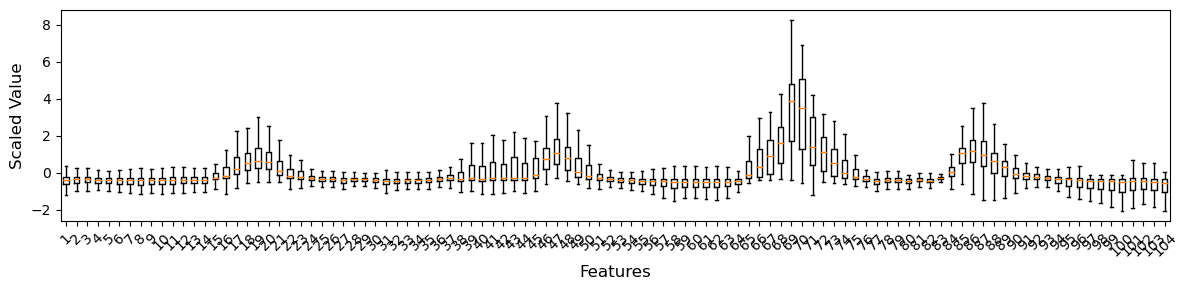

In [12]:
train_cnn_regression.plot_boxplot_scaled_features(train_cnn_regression.X_train_standardized_rowwise, xticks_list = None)

In [13]:
# Standardize the y features using Standard Scaler
train_cnn_regression.standardize_y_column_wise()

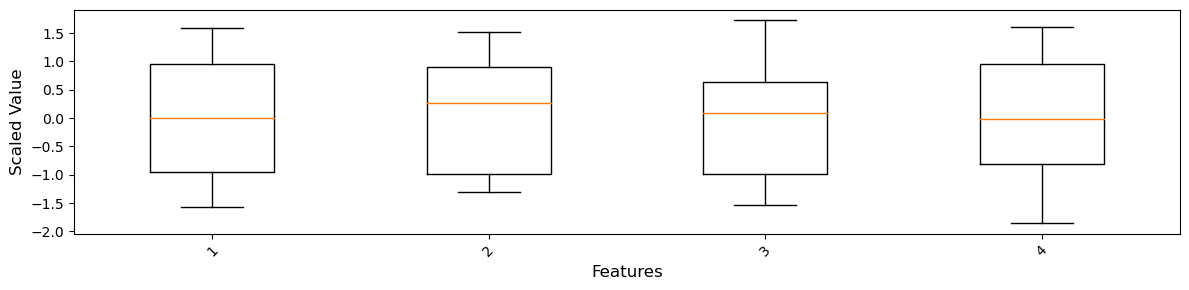

In [14]:
train_cnn_regression.plot_boxplot_scaled_features(train_cnn_regression.y_train_standardized_columnwise)

In [15]:
# train_cnn_regression.y_train_standardized_columnwise

In [16]:
train_cnn_regression.X_train_min = train_cnn_regression.X_train.min(axis=1)
train_cnn_regression.X_train_max = train_cnn_regression.X_train.max(axis=1)

In [17]:
train_cnn_regression.X_val_min = train_cnn_regression.X_val.min(axis=1)
train_cnn_regression.X_val_max = train_cnn_regression.X_val.max(axis=1)

In [18]:
train_cnn_regression.X_test_min = train_cnn_regression.X_test.min(axis=1)
train_cnn_regression.X_test_max = train_cnn_regression.X_test.max(axis=1)

In [19]:
df_MinMax_train = pd.DataFrame((train_cnn_regression.X_train_min, train_cnn_regression.X_train_max)).T
df_MinMax_val = pd.DataFrame((train_cnn_regression.X_val_min, train_cnn_regression.X_val_max)).T
df_MinMax_test = pd.DataFrame((train_cnn_regression.X_test_min, train_cnn_regression.X_test_max)).T

In [20]:
df_MinMax_train.rename(columns={0:'min', 1:'max'}, inplace=True)

In [21]:
df_MinMax_train.head()

,min,max
28744,8.265340e-12,3.445259e-08
6288,8.080712e-22,8.397132e-14
13749,2.734403e-07,8.632182e-06
11713,4.414951e-16,3.373262e-10
15538,3.722576e-07,6.859888e-06


In [22]:
# plt.loglog(train_cnn_regression.X_train_max, 'k.', alpha = 0.4)
# plt.loglog(train_cnn_regression.X_train, 'r.', label='X_train', alpha = 0.4)
# plt.loglog(train_cnn_regression.X_train_min, 'r.', alpha = 0.4)

---

In [23]:
train_cnn_regression.standardize_X_column_wise(
                                                X_train = df_MinMax_train.values,
                                                X_val   = df_MinMax_val.values,
                                                X_test  = df_MinMax_test.values,
                                                )

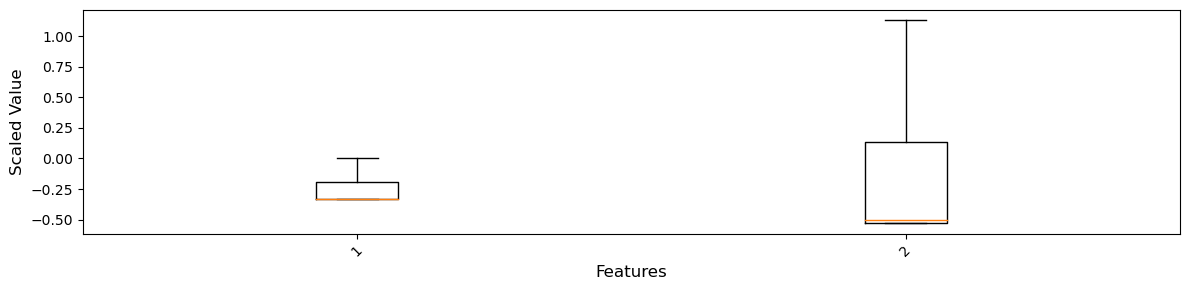

In [24]:
train_cnn_regression.plot_boxplot_scaled_features(train_cnn_regression.X_test_standardized_columnwise)

# Step 3: Load the Trained CNN model

## Load Saved Models

In [25]:
model = load_model('../../outputs/trained_models/my_model_architecture__xStand_yStand_MinMax_v2.h5')
model.load_weights('../../outputs/trained_models/my_model_weights__xStand_yStand_MinMax_v2.h5')

# Loading the saved history object
with open('../../outputs/trained_models/training_history__xStand_yStand_MinMax_v2.pkl', 'rb') as file:
    history = pk.load(file)    

2023-07-19 15:51:39.230180: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-19 15:51:39.275065: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [26]:
train_cnn_regression.trained_model = model
train_cnn_regression.trained_model_history = history

# Step 4: Check Trained Model

---

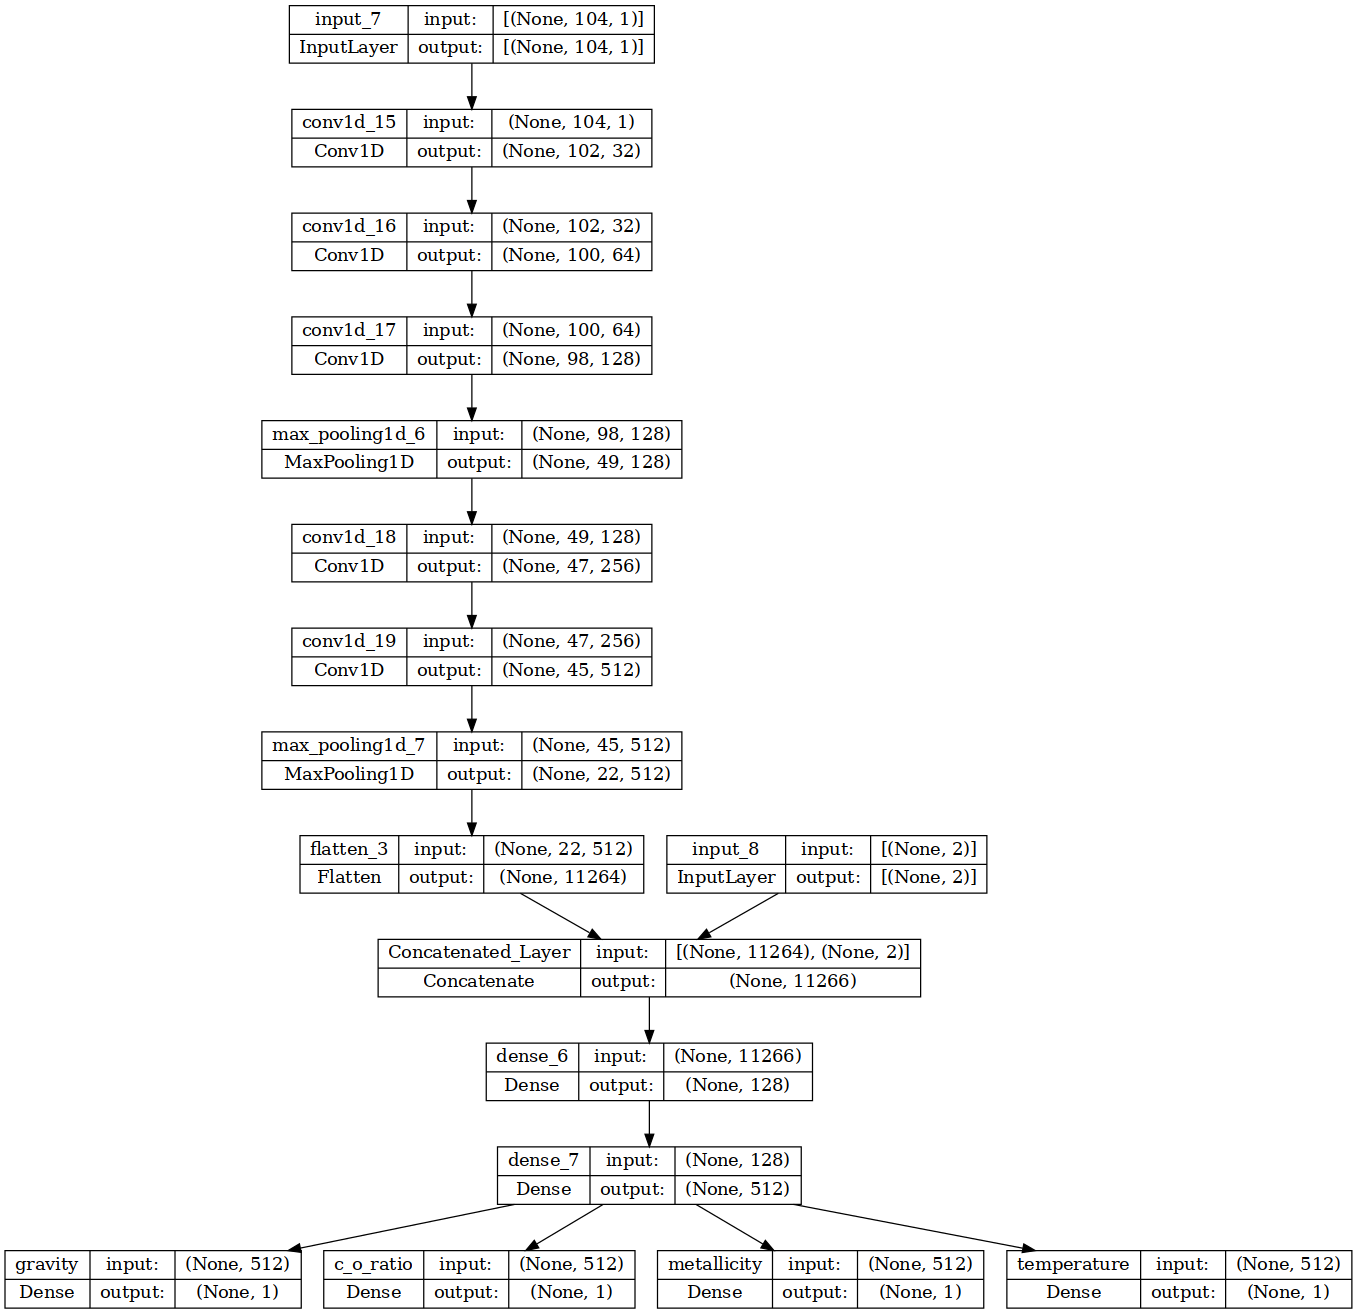

In [27]:
tf.keras.utils.plot_model(
                train_cnn_regression.trained_model,
                # to_file="model.png",
                show_shapes=True,
                show_dtype=False,
                show_layer_names=True,
                rankdir="TB",
                expand_nested=True,
                dpi=90,
                layer_range=None,
                show_layer_activations=False,
)

In [28]:
train_cnn_regression.trained_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 104, 1)]     0           []                               
                                                                                                  
 conv1d_15 (Conv1D)             (None, 102, 32)      128         ['input_7[0][0]']                
                                                                                                  
 conv1d_16 (Conv1D)             (None, 100, 64)      6208        ['conv1d_15[0][0]']              
                                                                                                  
 conv1d_17 (Conv1D)             (None, 98, 128)      24704       ['conv1d_16[0][0]']              
                                                                                            

In [29]:
train_cnn_regression.plot_model_loss(title = 'X:StandRow, y:StandCol - MinMax:StandCol, ToyCNNmodel')

### Plot Y predicted vs Y_Actual: Histogram & Scatter plot

1/1 [==============================] - 0s 155ms/step


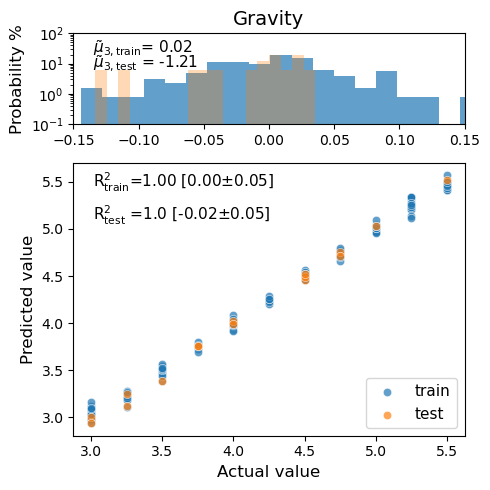

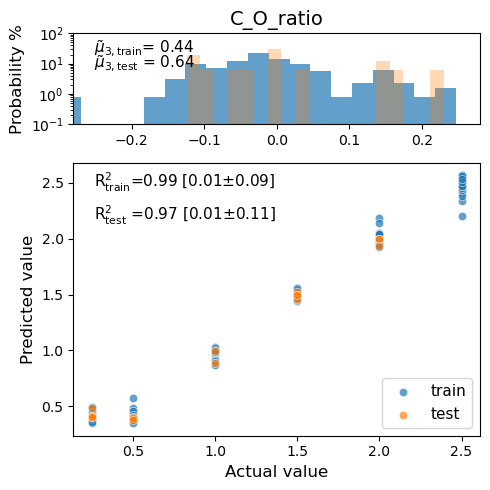

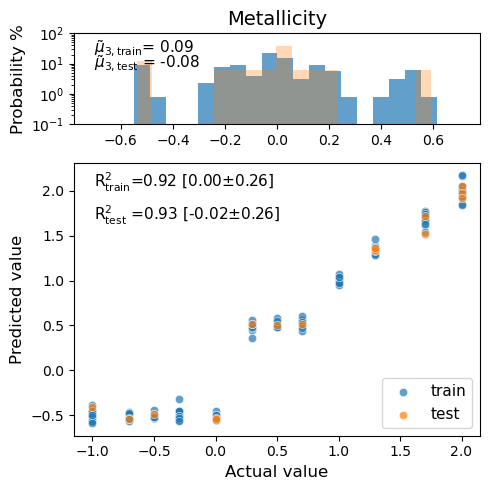

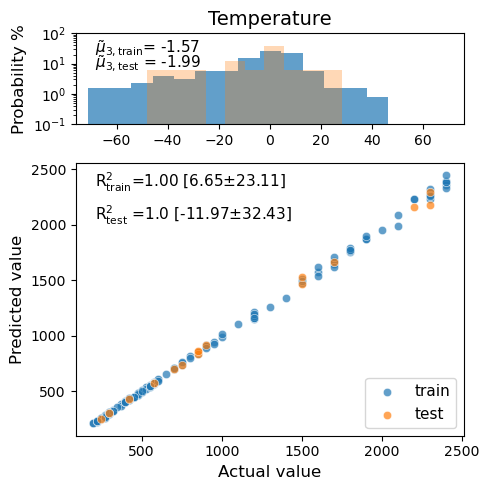

In [30]:
i = 199
regression_report(
        trained_model = train_cnn_regression,
    
        Xtrain = [train_cnn_regression.X_train_standardized_rowwise[::i],
                  train_cnn_regression.X_train_standardized_columnwise[::i]],
    
        Xtest  = [train_cnn_regression.X_test_standardized_rowwise[::i], 
                  train_cnn_regression.X_test_standardized_columnwise[::i]],
    
        ytrain = train_cnn_regression.y_train_standardized_columnwise[::i],
    
        ytest  = train_cnn_regression.y_test_standardized_columnwise[::i],
    
        target_i = 4,
        
        xy_top   = [0.05, 0.7],
        xy_bottom= [0.05, 0.85],
        print_results = False,        
                 )

# Step 5: Predict Observational data using the trained model

## ROSS 458C

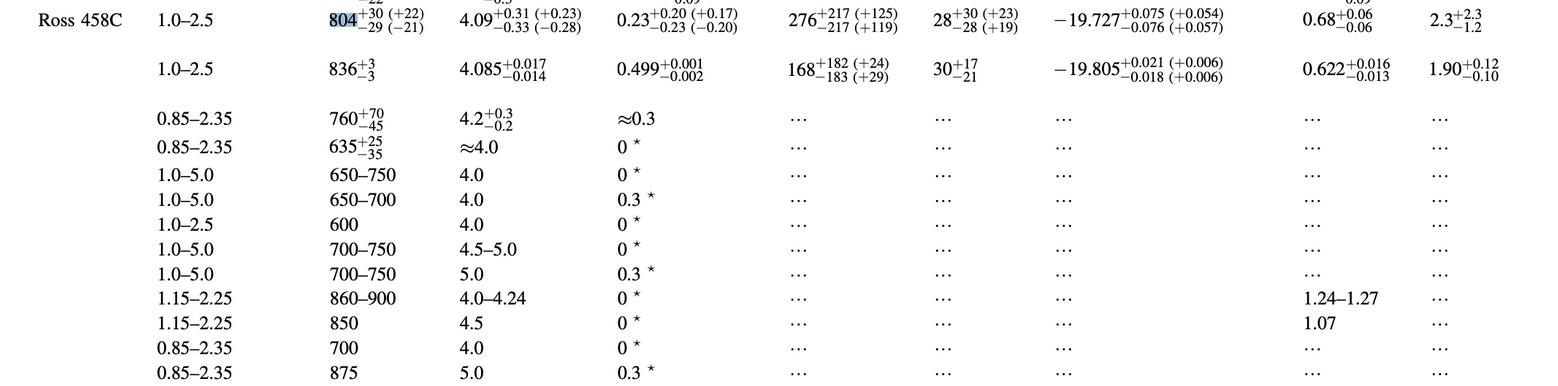

---

Steps: 
- Define the literature reported data for the object
- Instintiate ObsParameterPredictor class
- load_observational_spectra
    - replace negative Flam with zero
    - take the average of neibougrs for Flam_error <= 0
    - plot_observational_spectra_errorbar_
- Process_Observational_Dataset
    - Instintiate ProcessObservationalDataset class
    - define feature_names_synthetic and feature_names_obs
    - flux_interpolated
    - 

In [263]:
# define the brown dwarf literature data for Teff, logg, [M/H], and C/O
# ... and also the distance to the object [in pc] and its radius in Rjup
HD3651B_BD_literature_info = {'bd_name':'HD3651B',
          'bd_Teff':818,
          'bd_logg':3.94,
          'bd_met': -0.22, 
          'bd_distance_pc' : 11.134, 
          'bd_radius_Rjup' : 1.0 * 0.81 } 

Ross458C_BD_literature_info = {'bd_name':'Ross458C',
          'bd_Teff':804,
          'bd_logg':4.09,
          'bd_met': 0.23, 
          'bd_distance_pc' : 11.509, 
          'bd_radius_Rjup' : 1.0 * 0.68 } 

GJ570D_BD_literature_info = {'bd_name':'GJ570D',
          'bd_Teff':818,
          'bd_logg':3.94,
          'bd_met': -0.22, 
          'bd_distance_pc' : 5.884, 
          'bd_radius_Rjup' : 1.06*0.79 } 

In [264]:
brown_dwarf_literature_info = GJ570D_BD_literature_info
predict = ObsParameterPredictor(object_name = brown_dwarf_literature_info['bd_name'], #Ross458C, HD3651B, GJ570D
                                training_dataset_df = df,
                                wl = wl, 
                                train_cnn_regression_class = train_cnn_regression,
                                bd_literature_dic = brown_dwarf_literature_info
                                )

In [265]:
predict.load_observational_spectra()

,wl,F_lambda,F_lambda_error
0,0.657971,4.569383e-17,7.119990e-17
1,0.660155,4.581152e-17,7.119990e-17
2,0.662332,4.592921e-17,7.119990e-17
3,0.664501,4.604690e-17,7.962084e-17
4,0.666665,4.616459e-17,8.804178e-17


Loading BokehJS ...

In [266]:
predict.Process_Observational_Dataset(
    __print_results__=False,
    __plot_predicted_vs_observed__=True,
    )

,2.512,2.487,2.462,2.438,2.413,2.389,2.366,2.342,2.319,2.296,...,0.933,0.924,0.915,0.906,0.897,gravity,metallicity,c_o_ratio,temperature,is_augmented
0,1.548122e-08,1.840284e-08,1.732513e-08,1.211516e-08,9.014971e-09,5.513255e-09,4.080186e-09,2.455613e-09,5.380212e-09,2.999276e-09,...,5.630125e-09,8.108275e-09,7.060778e-09,5.272229e-09,3.062835e-09,5.43,-0.39,1.82,824.070007,no


,2.512,2.487,2.462,2.438,2.413,2.389,2.366,2.342,2.319,2.296,...,0.981,0.971,0.962,0.952,0.943,0.933,0.924,0.915,0.906,0.897
0,1.704898e-08,1.963423e-08,1.499168e-08,1.658413e-08,1.095908e-08,7.629787e-09,7.797153e-09,7.286434e-09,5.957517e-09,6.775396e-09,...,2.591459e-08,1.729939e-08,1.284961e-08,1.156457e-08,1.220272e-08,6.523155e-09,1.041731e-08,9.457430e-09,7.663860e-09,6.479807e-09


In [267]:
predict.predict_from_random_spectra(random_spectra_num= 50,
                                     __print_results__= True,
                                     __plot_randomly_generated_spectra__= False,
                                     __plot_histogram__= False,
                                     __plot_boxplot_hist__= False,
                                     __plot_predicted_vs_observed__= False,
                                     __plot_predicted_vs_spectra_errorbar__= False,
                                     __plot_predictedRandomSpectra_vs_ObservedSpectra_errorbar__ = True,
                                     __calculate_confidence_intervals_std_df__ = True,
                                    )

******************************

Predicted Targets from Randomly Generated Spectra:
{   'c_o_ratio': 1.7357341051101685,
    'gravity': 5.353797435760498,
    'metallicity': -0.38444313406944275,
    'temperature': 802.9295043945312}
******************************



,logg,c_o,met,T
count,50.000000,50.000000,50.000000,50.000000
mean,5.353797,1.735734,-0.384443,802.929504
std,0.147623,0.146955,0.058930,32.023987
min,5.077205,1.417450,-0.487970,736.122375
25%,5.244488,1.638686,-0.423403,779.796768
50%,5.361862,1.737361,-0.394049,803.298126
75%,5.457296,1.858596,-0.347980,826.890717
max,5.650150,2.132602,-0.213035,879.218933


,confidence_level_lower,confidence_level_upper,mean,std_values,wl
0.896780,1.240661e-08,1.389401e-08,1.315031e-08,2.616847e-09,0.896780
0.905792,1.475820e-08,1.651070e-08,1.563445e-08,3.083254e-09,0.905792
0.914896,1.375868e-08,1.547376e-08,1.461622e-08,3.017421e-09,0.914896
0.924091,9.371874e-09,1.073564e-08,1.005376e-08,2.399331e-09,0.924091
0.933378,6.882101e-09,7.971860e-09,7.426980e-09,1.917261e-09,0.933378


********** Predicted Targets dic **********
{'gravity': 5.353797435760498, 'c_o_ratio': 1.7357341051101685, 'metallicity': -0.38444313406944275, 'temperature': 802.9295043945312}
Printing results:


,confidence_level_lower,confidence_level_upper,mean,std_values,wl
0.896780,1.240661e-08,1.389401e-08,1.315031e-08,2.616847e-09,0.896780
0.905792,1.475820e-08,1.651070e-08,1.563445e-08,3.083254e-09,0.905792
0.914896,1.375868e-08,1.547376e-08,1.461622e-08,3.017421e-09,0.914896
0.924091,9.371874e-09,1.073564e-08,1.005376e-08,2.399331e-09,0.924091
0.933378,6.882101e-09,7.971860e-09,7.426980e-09,1.917261e-09,0.933378


# Optimize the Radius

In [268]:
import numpy as np
from scipy.stats import chi2
from scipy.interpolate import interp1d
from scipy.stats import chisquare

def chi_square_test(data1, data2, error1, error2, x1, x2, num_points=len(x2)):
    """
    Perform the chi-square test to evaluate the similarity between two datasets with error bars.
    
    Args:
        data1 (array-like): The first dataset.
        data2 (array-like): The second dataset.
        error1 (array-like): The error bars associated with the first dataset.
        error2 (array-like): The error bars associated with the second dataset.
        num_points (int): The number of points to interpolate for datasets with different lengths.
    
    Returns:
        float: The chi-square test statistic.
        float: The p-value.
    
    Raises:
        ValueError: If the lengths of the datasets or error bars are not equal.
    
    """
    # Convert input to NumPy arrays for easier calculations
    data1 = np.asarray(data1)
    data2 = np.asarray(data2)
    error1 = np.asarray(error1)
    error2 = np.asarray(error2)
    
#     # Check if the lengths of the datasets and error bars are equal
#     if len(data1) != len(data2) or len(error1) != len(error2) or len(data1) != len(error1):
#         raise ValueError("The lengths of the datasets and error bars must be equal.")
    
    # Interpolate datasets if they have different lengths
    if len(data1) != len(data2):
        # x1 = np.linspace(0, 1, len(data1))
        # x2 = np.linspace(0, 1, len(data2))
        f1 = interp1d(x1, data1, kind='quadratic')
        f2 = interp1d(x2, data2, kind='quadratic')
        data1 = f1(x2)
        data2 = f2(x2)
        plt.semilogy(x2,data1)
        plt.semilogy(x2,data2)
        error1 = np.mean(error1) * np.ones(num_points)
        error2 = np.mean(error2) * np.ones(num_points)
    
    # Calculate the chi-square test statistic
    chi2_stat = np.sum(((data1 - data2) / np.sqrt(error1**2 + error2**2))**2)
    
    # Calculate the degrees of freedom
    degrees_of_freedom = len(data1) - 1
    
    # Calculate the p-value using the chi-square distribution
    p_value = 1.0 - chi2.cdf(chi2_stat, degrees_of_freedom)
    
    return chi2_stat, p_value


In [269]:
data1 = predict.Fnu_obs_absolute
error1 = predict.Fnu_obs_absolute_err
x1 = predict.obs_data_df['wl']

In [270]:
data2 = predict.confidence_intervals_std_df['mean']
error2 = predict.confidence_intervals_std_df['std_values']
x2 = predict.confidence_intervals_std_df['wl'].values[::-1]

(nan, nan)

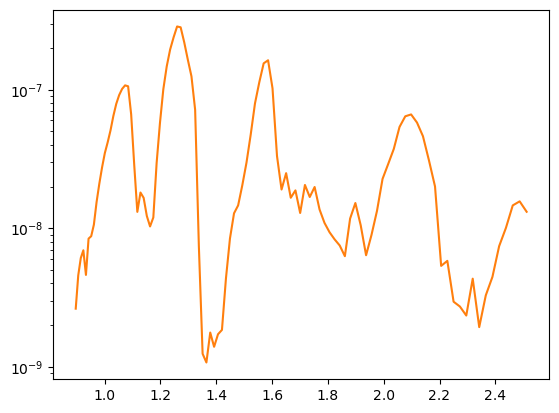

In [271]:
chi_square_test(data1, data2, error1, error2, x1, x2)

(81.41918688745824, 0.9425267828536457)

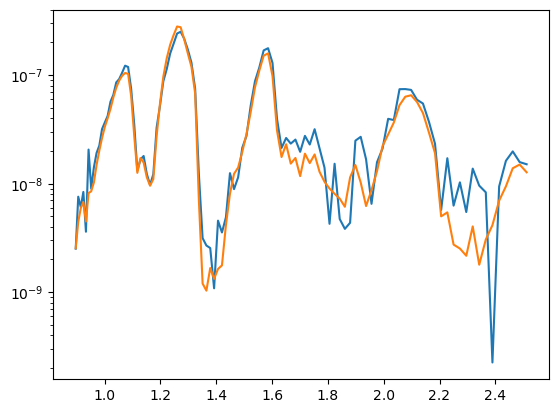

In [204]:
chi_square_test(data1, data2, error1, error2, x1, x2)

(206.58687327205638, 6.299485155736306e-09)

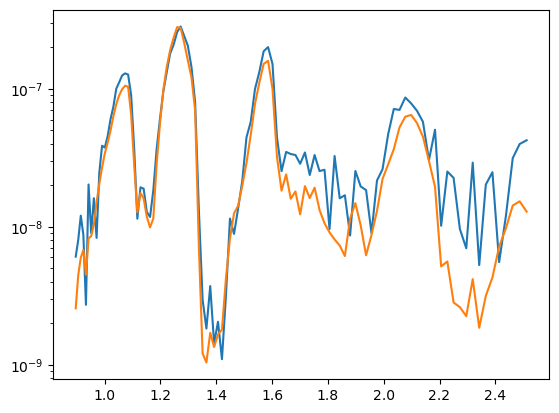

In [195]:
chi_square_test(data1, data2, error1, error2, x1, x2)

(309.15945319668015, 0.0)

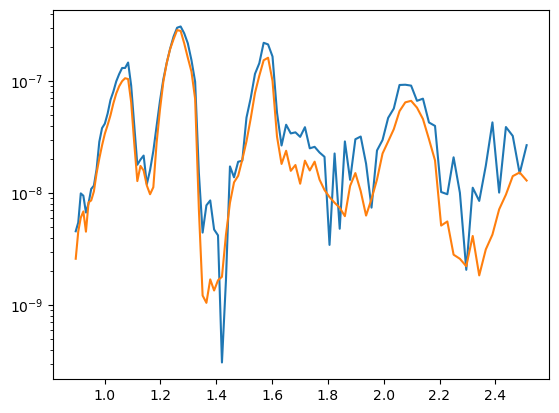

In [186]:
chi_square_test(data1, data2, error1, error2, x1, x2)

(475.26291467534276, 0.0)

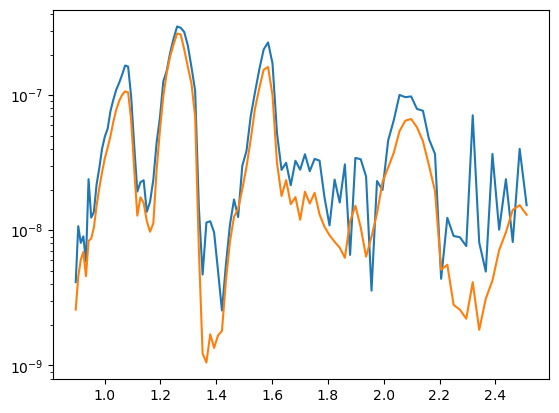

In [170]:
chi_square_test(data1, data2, error1, error2, x1, x2)

In [176]:
data1 = [1, 2, 3, 4, 5, 3.4, 5.5] # Obs
error1 = [0.1, 0.2, 0.15, 0.3, 0.25, .4, .9]

data2 = [1.2, 2.3,   3.1, 4.2, 5.5] # ML predicted 1
error2 = [0.15, 0.18, 0.12, 0.25, 0.22]

data3 = [1, 2, 3, 4, 5, 6, 7]# ML predicted 2
error3 = [0.15, 0.18, 0.12, 0.25, 0.22, 0.25, 0.22]


In [51]:
chi_square_test(data1, data3, error1, error3)

(4.659832246039142, 0.5881214309098994)

---

# END ------